<a href="https://colab.research.google.com/github/thequiickbrownfox/CNN-prediction/blob/main/Fashion_MNIST_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist= datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

In [ ]:
train_images, test_images= train_images/255.0, test_images/255.0

In [ ]:
train_images= train_images.reshape((train_images.shape[0],28,28,1))
test_images= test_images.reshape((test_images.shape[0],28,28,1))


In [ ]:
fashion= models.Sequential([
    layers.Conv2D(32,(3,3), activation= 'relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(10)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
fashion.compile(
    optimizer= 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics=['accuracy']
)
history= fashion.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7487 - loss: 0.6939 - val_accuracy: 0.8698 - val_loss: 0.3632
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8776 - loss: 0.3355 - val_accuracy: 0.8838 - val_loss: 0.3208
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8951 - loss: 0.2820 - val_accuracy: 0.8926 - val_loss: 0.3005
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9088 - loss: 0.2462 - val_accuracy: 0.8998 - val_loss: 0.2807
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9195 - loss: 0.2175 - val_accuracy: 0.8998 - val_loss: 0.2768


In [ ]:
test_loss,test_acc= fashion.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8998 - loss: 0.2768

Test Accuracy: 0.8998000025749207


In [ ]:
# class_labels is a list of class names corresponding to the 10 categories in the Fashion MNIST dataset
class_labels= [
    'T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Selects any index of any image from test_images (indexing starts from 0).
index= 5
test_image= test_images[index]

In [ ]:

input_image= np.expand_dims(test_image, axis=0)
# Adding an extra dimension to match the model’s expected input shape.

In [ ]:
result= fashion.predict(input_image)
predicted_class= np.argmax(result)
prediction= class_labels[predicted_class]

# np.argmax(result) → Finds the index of the highest probability (i.e., the predicted class).
# class_labels[predicted_class] → Converts the index into the actual class name.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


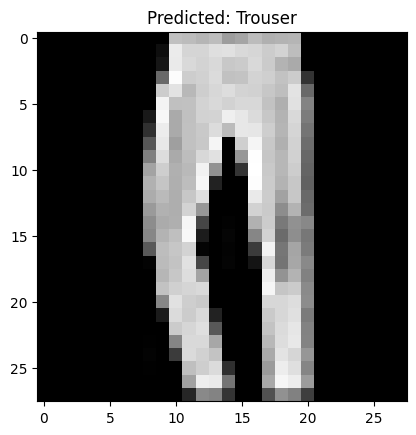

Predicted label: Trouser


In [ ]:
plt.imshow(test_image.reshape(28,28), cmap= 'gray')
plt.title(f'Predicted: {prediction}')
plt.show()

print("Predicted label:", prediction)

**Tweaking Dataset**

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
from tensorflow.keras.datasets import fashion_mnist

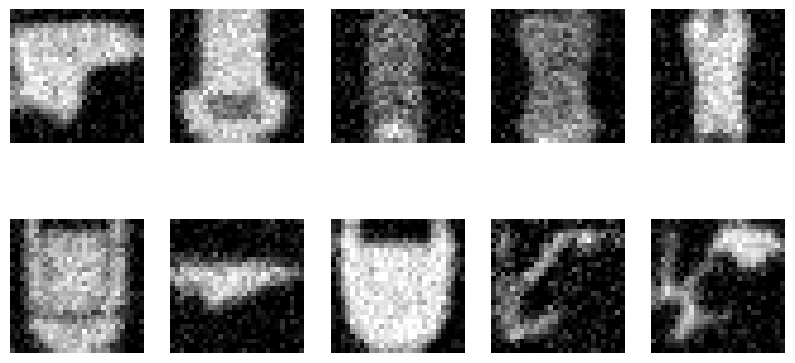

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Three modifications intended- Increasing blur, Rotation by 180 degree and adding gaussian noise

# Function to apply transformations
def modified_image(image):
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    #(5,5) determines the strength of the blur.

    # Rotate 180 degrees
    rotated = cv2.rotate(blurred, cv2.ROTATE_180)

    # Add Gaussian Noise
    noise = np.random.normal(0, 25, image.shape)
    noisy = np.clip(rotated + noise, 0, 255).astype(np.uint8)

    return noisy

modified_train_images = np.array([modified_image(img) for img in train_images])
modified_test_images = np.array([modified_image(img) for img in test_images])

modified_train_images = modified_train_images / 255.0
modified_test_images = modified_test_images / 255.0

modified_train_images = modified_train_images.reshape(-1, 28, 28, 1)
modified_test_images = modified_test_images.reshape(-1, 28, 28, 1)
#The additional 1 represents the grayscale channel (unlike the RGB channels).

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(modified_train_images[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
np.savez_compressed('fashion_mnist_augmented.npz',
                     train_images=modified_train_images,
                     train_labels=train_labels,
                     test_images=modified_test_images,
                     test_labels=test_labels)


In [ ]:
fashion.save('fashion_model.keras')

In [ ]:
from tensorflow.keras.models import load_model
model= load_model('fashion_model.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


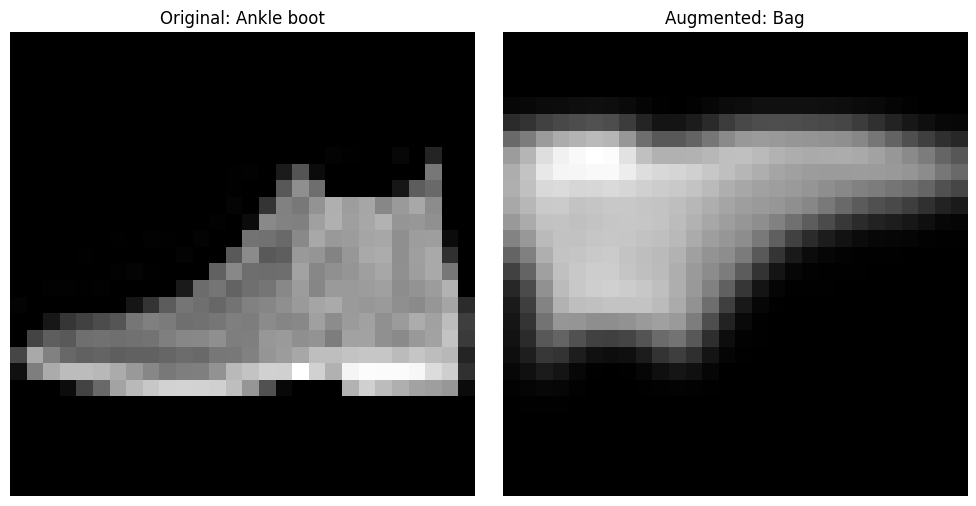

Original Image Prediction: Ankle boot
Augmented Image Prediction: Bag


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

model = load_model('fashion_model.keras')

class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def augment_image(image):
    rotated_image = cv2.rotate(image, cv2.ROTATE_180)

    blurred_image = cv2.GaussianBlur(rotated_image, (5, 5), 0)

    noise = np.random.normal(0, 0.1, blurred_image.shape)
    noisy_image = np.clip(blurred_image + noise, 0, 255)

    return noisy_image

index = 0  # Change the index for different images
test_image = test_images[index]  # Assuming test_images are loaded

augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]  #np.argmax helps us find which class has the highest probability.
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")


**Trying it out for multiple instances**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


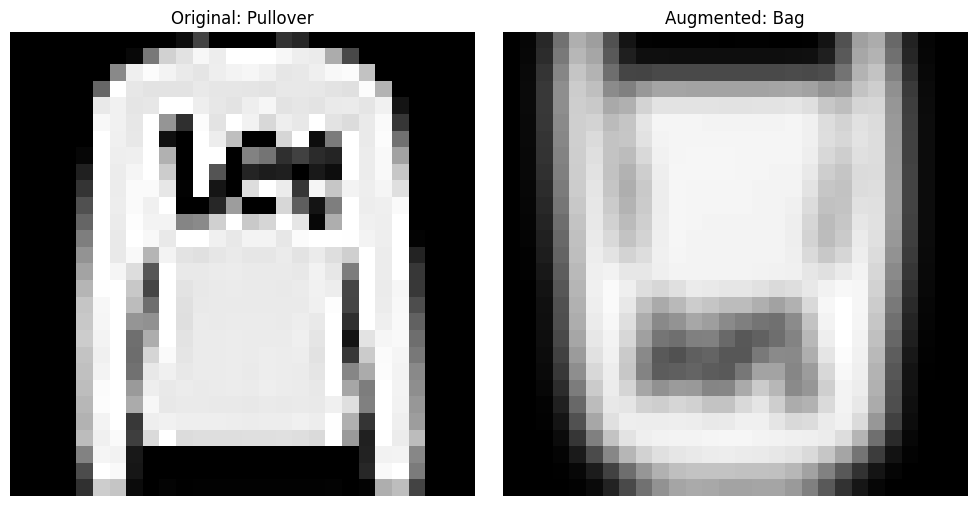

Original Image Prediction: Pullover
Augmented Image Prediction: Bag


In [ ]:
index = 1
test_image = test_images[index]

augmented_image = augment_image(test_image)

original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


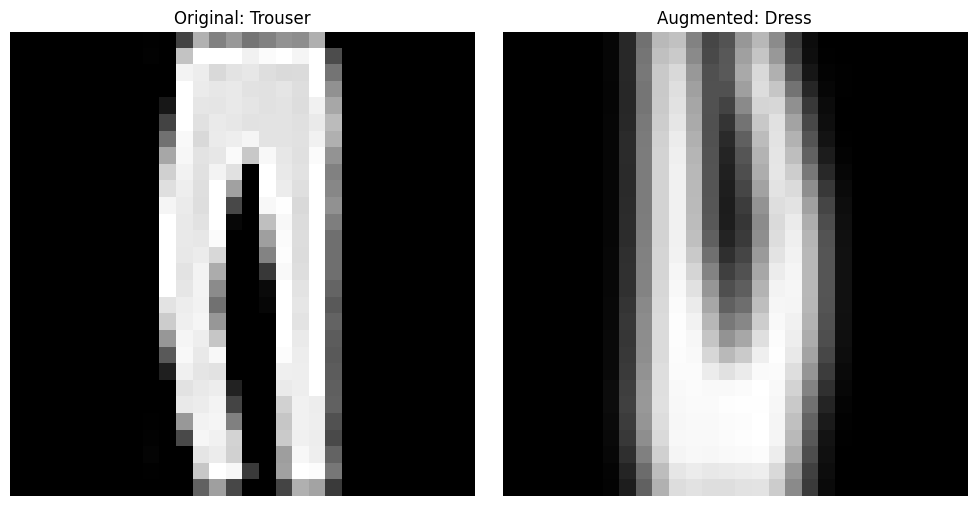

Original Image Prediction: Trouser
Augmented Image Prediction: Dress


In [ ]:
index = 2
test_image = test_images[index]

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


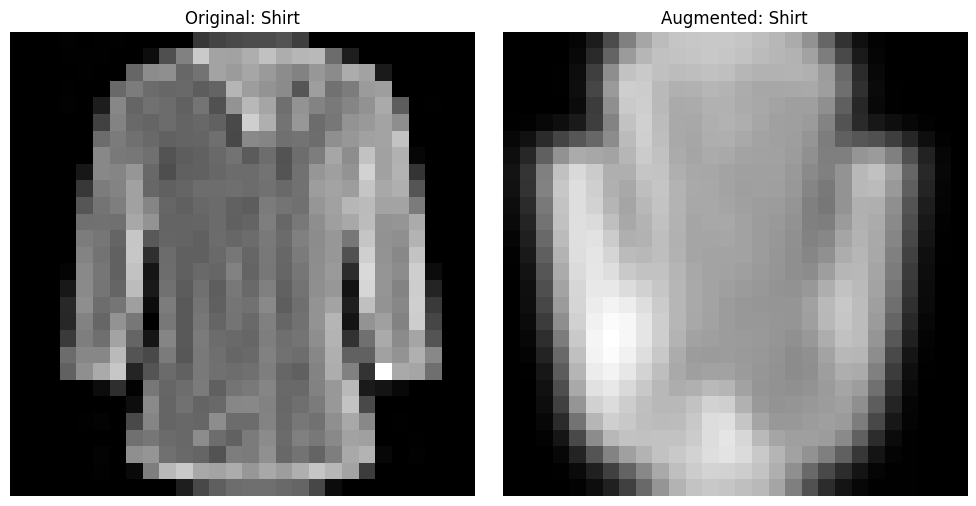

Original Image Prediction: Shirt
Augmented Image Prediction: Shirt


In [ ]:
index = 4  # Change this for different images
test_image = test_images[index]  # Assuming you have test_images loaded

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


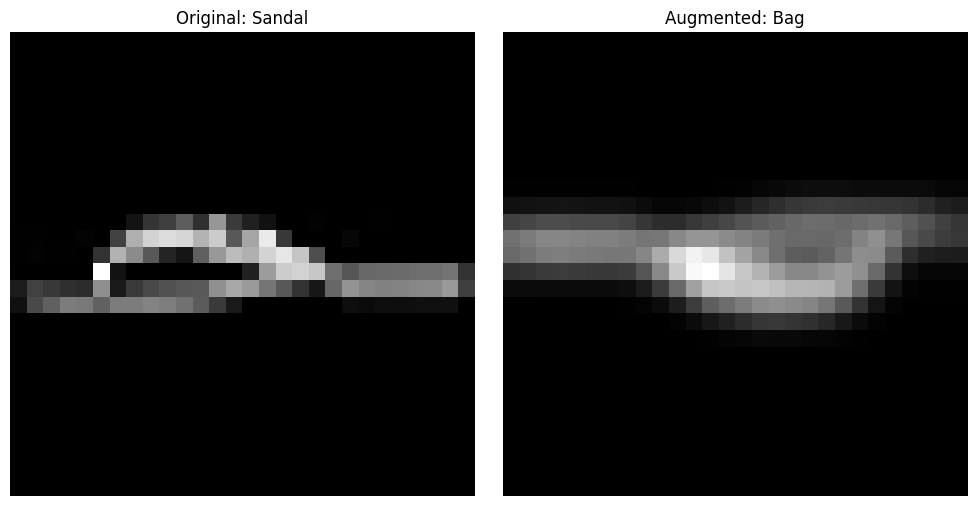

Original Image Prediction: Sandal
Augmented Image Prediction: Bag


In [ ]:
index =  8# Change this for different images
test_image = test_images[index]  # Assuming you have test_images loaded

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


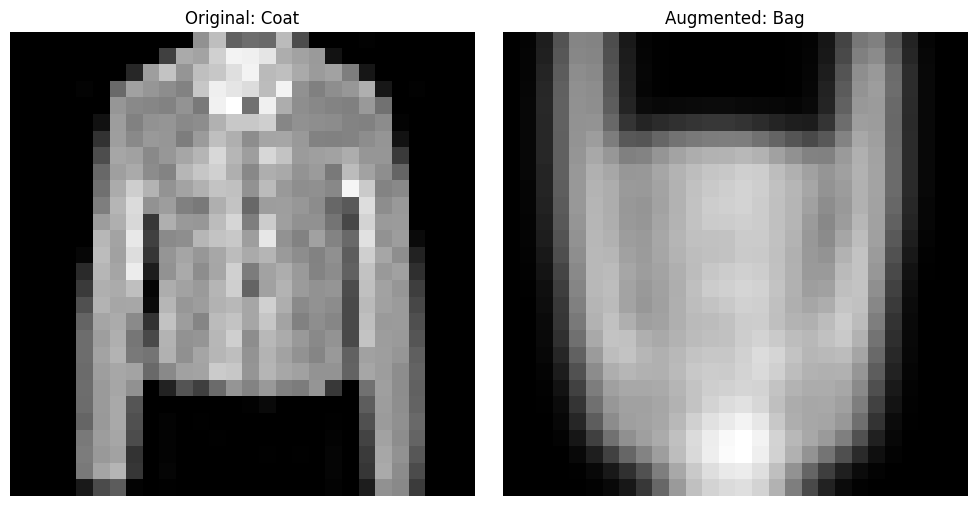

Original Image Prediction: Coat
Augmented Image Prediction: Bag


In [ ]:
index = 10  # Change this for different images
test_image = test_images[index]  # Assuming you have test_images loaded

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


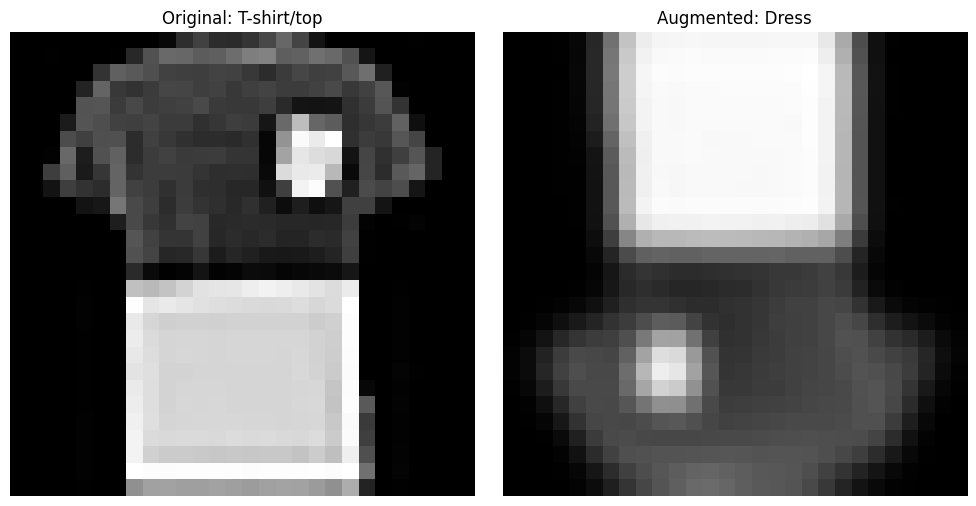

Original Image Prediction: T-shirt/top
Augmented Image Prediction: Dress


In [ ]:
index = 120  # Change this for different images
test_image = test_images[index]  # Assuming you have test_images loaded

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


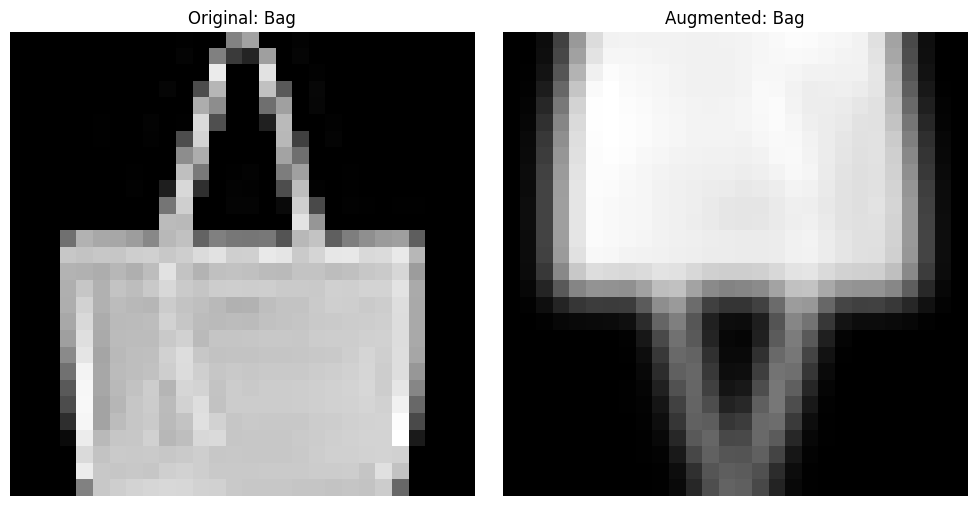

Original Image Prediction: Bag
Augmented Image Prediction: Bag


In [ ]:
index = 900  # Change this for different images
test_image = test_images[index]  # Assuming you have test_images loaded

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


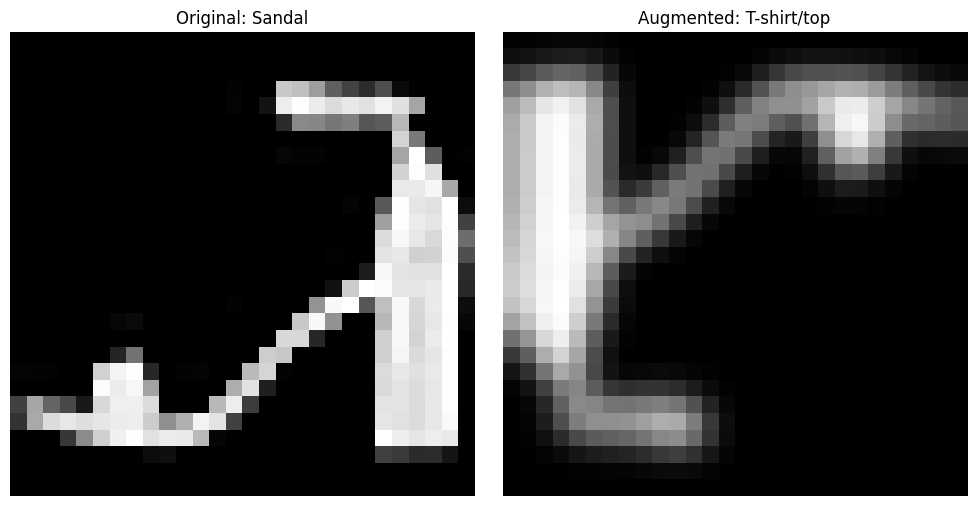

Original Image Prediction: Sandal
Augmented Image Prediction: T-shirt/top


In [ ]:
index = 1200  # Change this for different images
test_image = test_images[index]  # Assuming you have test_images loaded

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


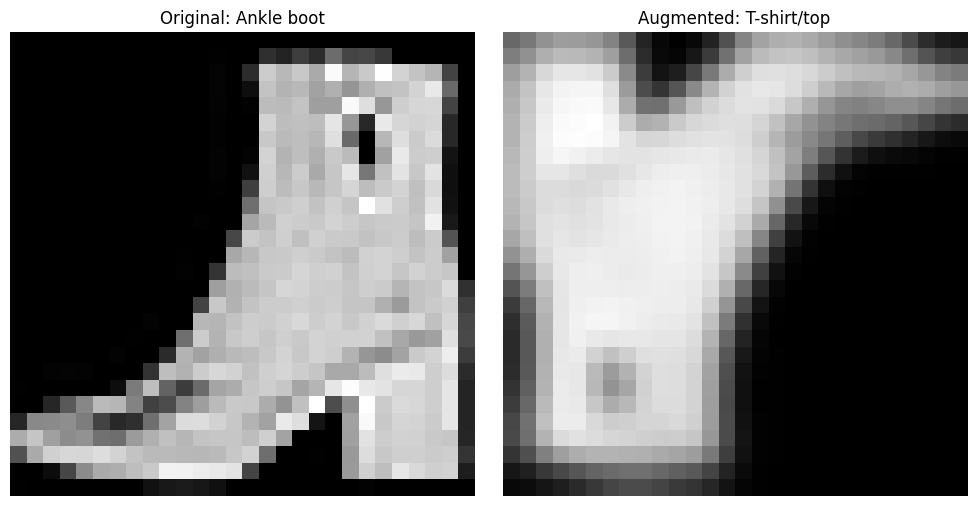

Original Image Prediction: Ankle boot
Augmented Image Prediction: T-shirt/top


In [ ]:
index = 6900  # Change this for different images
test_image = test_images[index]  # Assuming you have test_images loaded

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


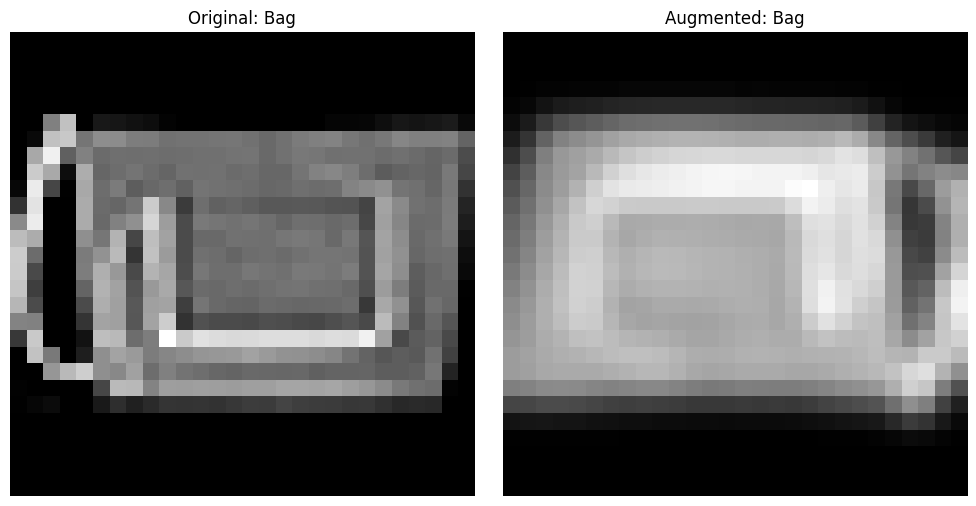

Original Image Prediction: Bag
Augmented Image Prediction: Bag


In [ ]:
index = 220  # Change this for different images
test_image = test_images[index]  # Assuming you have test_images loaded

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


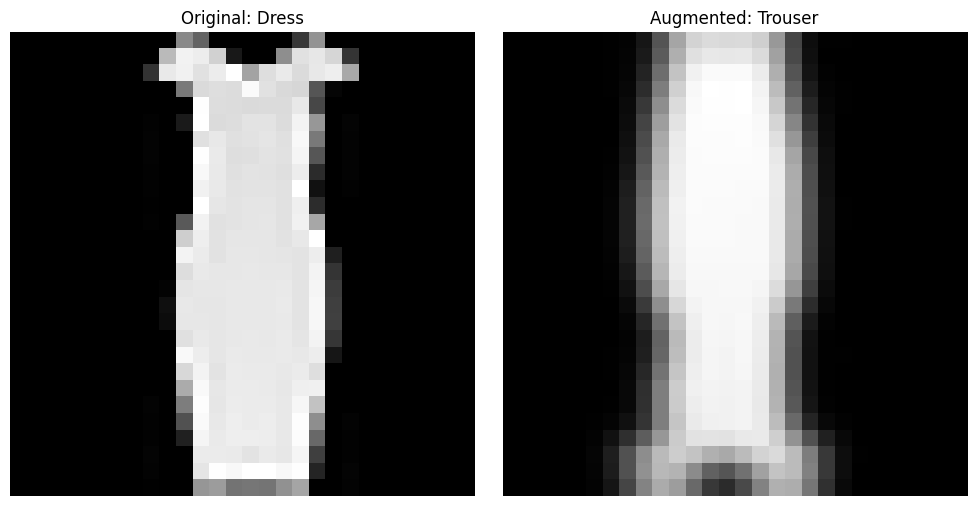

Original Image Prediction: Dress
Augmented Image Prediction: Trouser


In [ ]:
index = 666  # Change this for different images
test_image = test_images[index]  # Assuming you have test_images loaded

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


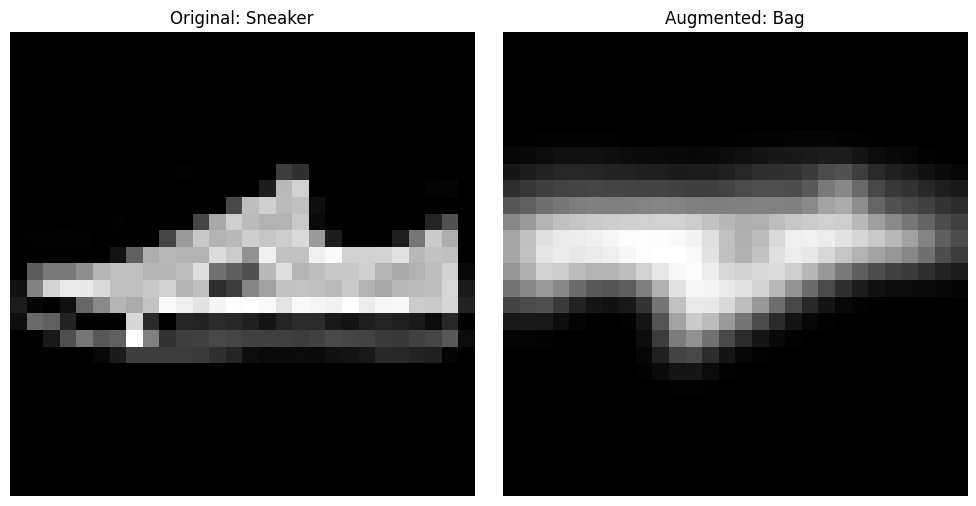

Original Image Prediction: Sneaker
Augmented Image Prediction: Bag


In [ ]:
index = 333  # Change this for different images
test_image = test_images[index]  # Assuming you have test_images loaded

# Augment the image
augmented_image = augment_image(test_image)

# Reshape and preprocess both original and augmented image
original_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize and reshape
augmented_image = np.expand_dims(augmented_image, axis=0) / 255.0  # Normalize and reshape

# Make predictions on both images
original_pred = model.predict(original_image)
augmented_pred = model.predict(augmented_image)

# Get predicted class (highest probability) for both images
original_class = class_labels[np.argmax(original_pred)]
augmented_class = class_labels[np.argmax(augmented_pred)]

# Display the original and augmented images with their predictions
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title(f"Original: {original_class}")
plt.axis('off')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title(f"Augmented: {augmented_class}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the predictions
print(f"Original Image Prediction: {original_class}")
print(f"Augmented Image Prediction: {augmented_class}")